### 2.3.1 데이터 불러오기

In [3]:
import pandas as pd

df= pd.read_csv("./data/주택규모별_주택건설_인허가실적_월별_누계__20210829223008.csv",
                encoding='cp949', skiprows=[i for i in range(1, 4)], index_col='시점') # ,index_col=index_col)

In [4]:
df.head()

,전국,수도권,지방권,지방권.1,지방권.2
시점,,,,,
2011. 01,18500,10895,7605,3172,4433
2011. 02,37676,21130,16546,4875,11671
2011. 03,70529,37046,33483,11645,21838
2011. 04,111685,58130,53555,20449,33106
2011. 05,144401,74181,70220,26140,44080


### 2.3.2 dataframe 행 삭제

In [6]:
df_per = df.loc[:,['수도권', '지방권']]
df_per.head()

,수도권,지방권
시점,,
2011. 01,10895,7605
2011. 02,21130,16546
2011. 03,37046,33483
2011. 04,58130,53555
2011. 05,74181,70220


In [7]:
df_per.iloc[:,0].head(24)

시점
2011. 01     10895
2011. 02     21130
2011. 03     37046
2011. 04     58130
2011. 05     74181
2011. 06     91005
2011. 07    108752
2011. 08    124040
2011. 09    142896
2011. 10    173180
2011. 11    190986
2011. 12    272156
2012. 01     14208
2012. 02     28820
2012. 03     41659
2012. 04     58928
2012. 05     76336
2012. 06     98848
2012. 07    123208
2012. 08    137645
2012. 09    164379
2012. 10    181371
2012. 11    202669
2012. 12    269290
Name: 수도권, dtype: int64

In [8]:
df_per = df.drop(['전국', '지방권.1', '지방권.2'],axis=1)
df_per.head()

,수도권,지방권
시점,,
2011. 01,10895,7605
2011. 02,21130,16546
2011. 03,37046,33483
2011. 04,58130,53555
2011. 05,74181,70220


In [9]:
df_per.shape

(126, 2)

In [11]:
def addition(a,b) :
    return a+b

In [12]:
addition(1,2)

3

In [12]:
# 반복문
for x in range(1, 5):
    print(x)

1
2
3
4


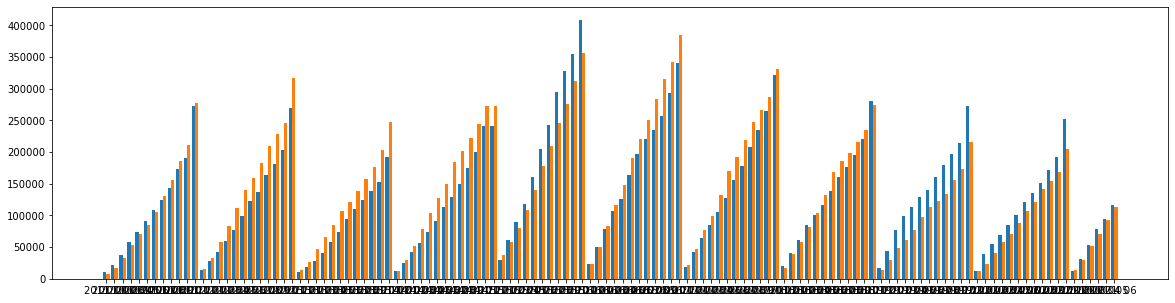

In [14]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,5))

value_a =  df_per.iloc[:,0] #수도권
value_b =  df_per.iloc[:,1] #지방권

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, len(df_per))
value_b_x = create_x(2, 0.8, 2, len(df_per))

ax = plt.subplot()
ax.bar(value_a_x, value_a)
ax.bar(value_b_x, value_b)

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(df_per.index)



plt.show()

In [13]:
# 데이터가 연말로 갈수록 많아짐

### [예제] 막대그래프 나란히 그리기

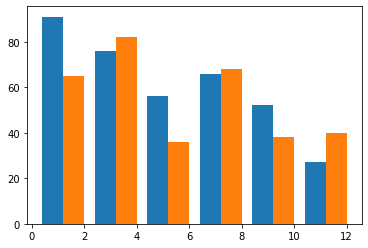

In [14]:
from matplotlib import pyplot as plt
drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]
sales1 = [91, 76, 56, 66, 52, 27]
sales2 = [65, 82, 36, 68, 38, 40]

n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar

store1_x = [t*element + w*n for element in range(d)]
plt.bar(store1_x, sales1)

n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 6 # Number of sets of bars
w = 0.8 # Width of each bar

store2_x = [t*element + w*n for element in range(d)]
plt.bar(store2_x, sales2)
plt.show()

### [예제] 누적 막대그래프 그리기

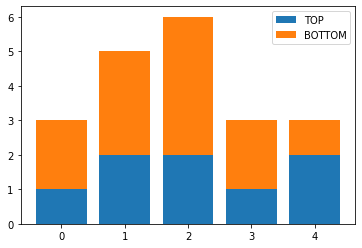

In [8]:
from matplotlib import pyplot as plt

down = [1, 2, 2, 1, 2]
top = [2, 3, 4, 2, 1]

plt.bar(range(len(down)), down) 
plt.bar(range(len(top)), top, bottom=down)

plt.legend(['TOP', 'BOTTOM'])
plt.show()

## 2.4 [draft] 인허가 실적 누적막대그래프

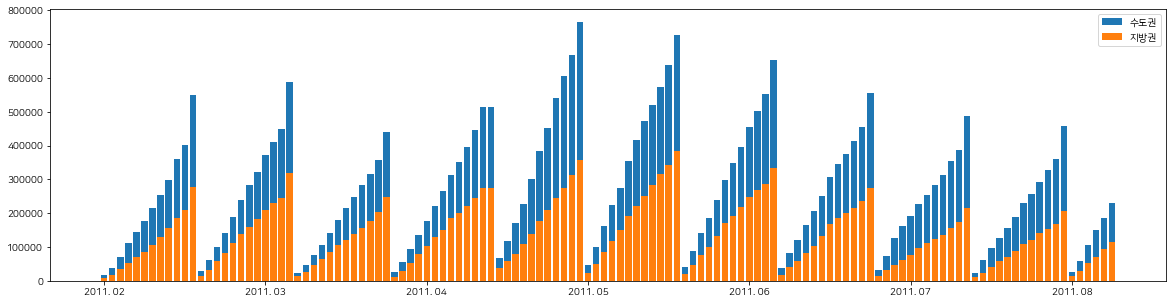

In [18]:
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot as plt
import matplotlib.font_manager as fm

plt.figure(figsize=(20,5))

path = 'C:\\Windows\\Fonts\\NanumSquareRoundB.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

top =  df_per.iloc[:,0]
down =  df_per.iloc[:,1]

plt.bar(range(len(top)), top, bottom=down)
plt.bar(range(len(down)), down) 

ax = plt.subplot()
# ax.bar(value_a_x, value_a)
ax.set_xticklabels(df_per.index)

plt.legend(['수도권', '지방권'])
plt.show()

x축 설정이 되어있지 않고, 연도별 집계가 필요해보입니다.

## 2.5 인허가 실적 시각화

### 2.5.1 데이터 로드

In [19]:
df= pd.read_csv("./data/주택규모별_주택건설_인허가실적_월별_누계__20210829223008.csv",
                encoding='cp949', skiprows=[i for i in range(1, 4)], index_col=None)

In [20]:
df.head()

,시점,전국,수도권,지방권,지방권.1,지방권.2
0,2011. 01,18500,10895,7605,3172,4433
1,2011. 02,37676,21130,16546,4875,11671
2,2011. 03,70529,37046,33483,11645,21838
3,2011. 04,111685,58130,53555,20449,33106
4,2011. 05,144401,74181,70220,26140,44080


### 2.5.2 연도 추출

In [21]:
df['YEAR'] = df['시점'].str[:4] #0,1,2,3
df.head()

,시점,전국,수도권,지방권,지방권.1,지방권.2,YEAR
0,2011. 01,18500,10895,7605,3172,4433,2011
1,2011. 02,37676,21130,16546,4875,11671,2011
2,2011. 03,70529,37046,33483,11645,21838,2011
3,2011. 04,111685,58130,53555,20449,33106,2011
4,2011. 05,144401,74181,70220,26140,44080,2011


In [22]:
# df['수도권_yearsum'] = df.groupby('YEAR').sum(df['수도권'])
# df.head()

### 2.5.3 연도별 합계 계산

In [23]:
df_year = df.groupby(['YEAR']).sum()
df_year

,전국,수도권,지방권,지방권.1,지방권.2
YEAR,,,,,
2011,2637837,1304397,1333440,485473,847967
2012,3180873,1397361,1783512,546654,1236858
2013,2433098,1042701,1390397,337863,1052534
2014,2993175,1310682,1682493,388118,1294375
2015,4809842,2536972,2272870,555324,1717546
2016,4507831,2095232,2412599,691732,1720867
2017,3898770,1805849,2092921,782094,1310827
2018,3312152,1598766,1713386,651508,1061878
2019,2889558,1645786,1243772,503796,739976


### 2.5.4  '21년 상반기 전국 <span style="color:red">인허가 물량(호)</span> data 시각화

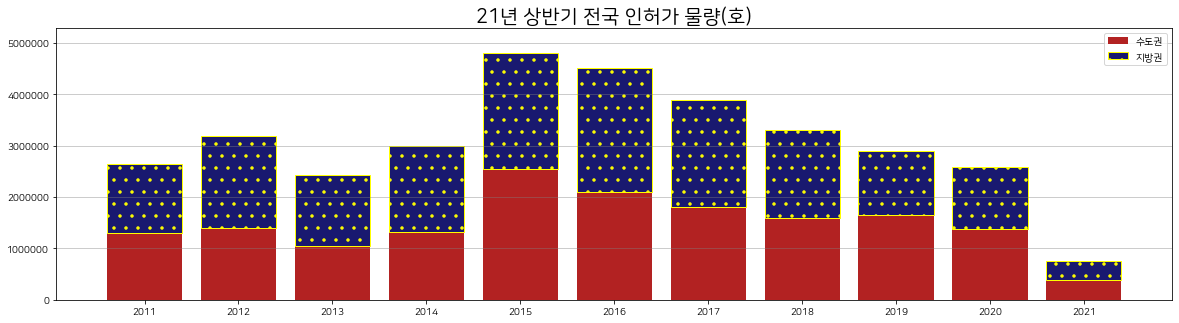

In [24]:
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

plt.figure(figsize=(20,5))

path = 'C:\\Windows\\Fonts\\NanumSquareRoundB.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

down =  df_year.iloc[:,1]# 수도권
top =  df_year.iloc[:,2] # 지방권

# 패턴 patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
plt.bar(df_year.index, down, color='firebrick')#,hatch="///",edgecolor='white')#수도권
plt.bar(df_year.index, top, bottom=down, color='midnightblue', hatch=".",edgecolor='yellow') #지방권

# plt.yticks('0', '1백만', '2백만', '3백만', '4백만', '5백만')
# # plt.tick_params(axis='y', direction='out', length=10, pad=15, labelsize=12, width=2, color='r')

y = down + top

import matplotlib.ticker as mticker

# plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(0, y.max()*1.1)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i')) #%i 는 int , %f 는 float, %.3f 백만호 : 0.001 백만호
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='-')

plt.legend(['수도권', '지방권'])
plt.title('21년 상반기 전국 인허가 물량(호)', fontsize='20')
plt.show()

---------------------------------------------------------------------------------------------------

## 2.6 '21년 상반기 전국 <span style="color:red">분양 물량(호)</span> data 분석

### 2.6.1 데이터 불러오기

In [25]:
import pandas as pd

df= pd.read_csv("./data/지역별_신규_분양세대수_20210830161140.csv", encoding='cp949')
df.head()
# skiprows=[i for i in range(1, 4)], index_col='시점')

,시점,전국,수도권,5대광역시 및 세종특별자치시,기타지방
0,2015. 10,65881,35020,7766,23095
1,2015. 11,51933,26407,8773,16753
2,2015. 12,20738,6560,3522,10656
3,2016. 01,11331,482,816,10033
4,2016. 02,11887,2920,1171,7796


### 2.6.2 데이터 나누기

In [26]:
df['지방권'] = df['전국'] - df['수도권']
df.head()

,시점,전국,수도권,5대광역시 및 세종특별자치시,기타지방,지방권
0,2015. 10,65881,35020,7766,23095,30861
1,2015. 11,51933,26407,8773,16753,25526
2,2015. 12,20738,6560,3522,10656,14178
3,2016. 01,11331,482,816,10033,10849
4,2016. 02,11887,2920,1171,7796,8967


In [27]:
df_presale = df.loc[:,['시점','수도권', '지방권']]
df_presale.head()

,시점,수도권,지방권
0,2015. 10,35020,30861
1,2015. 11,26407,25526
2,2015. 12,6560,14178
3,2016. 01,482,10849
4,2016. 02,2920,8967


###  2.6.3 행삭제

In [28]:
df_presale.drop([0, 1, 2])

,시점,수도권,지방권
3,2016. 01,482,10849
4,2016. 02,2920,8967
5,2016. 03,13043,11829
6,2016. 04,9877,21200
7,2016. 05,19015,19909
...,...,...,...
64,2021. 02,7422,7560
65,2021. 03,3325,17019
66,2021. 04,7299,9981
67,2021. 05,5597,7555


In [29]:
df_presale

,시점,수도권,지방권
0,2015. 10,35020,30861
1,2015. 11,26407,25526
2,2015. 12,6560,14178
3,2016. 01,482,10849
4,2016. 02,2920,8967
...,...,...,...
64,2021. 02,7422,7560
65,2021. 03,3325,17019
66,2021. 04,7299,9981
67,2021. 05,5597,7555


In [30]:
df_presale.drop([0, 1, 2], inplace=True)
df_presale

,시점,수도권,지방권
3,2016. 01,482,10849
4,2016. 02,2920,8967
5,2016. 03,13043,11829
6,2016. 04,9877,21200
7,2016. 05,19015,19909
...,...,...,...
64,2021. 02,7422,7560
65,2021. 03,3325,17019
66,2021. 04,7299,9981
67,2021. 05,5597,7555


In [31]:
df_presale.reset_index(drop=True, inplace=True)
df_presale

,시점,수도권,지방권
0,2016. 01,482,10849
1,2016. 02,2920,8967
2,2016. 03,13043,11829
3,2016. 04,9877,21200
4,2016. 05,19015,19909
...,...,...,...
61,2021. 02,7422,7560
62,2021. 03,3325,17019
63,2021. 04,7299,9981
64,2021. 05,5597,7555


In [32]:
df_presale['YEAR'] = df_presale['시점'].str[:4]
df_presale.head()

,시점,수도권,지방권,YEAR
0,2016. 01,482,10849,2016
1,2016. 02,2920,8967,2016
2,2016. 03,13043,11829,2016
3,2016. 04,9877,21200,2016
4,2016. 05,19015,19909,2016


In [33]:
df_presale = df_presale.groupby(['YEAR']).sum()
df_presale

,수도권,지방권
YEAR,,
2016,145331,168269
2017,82603,99047
2018,78454,79030
2019,86097,86562
2020,112992,113094
2021,37792,57882


## 2.7 '21년 상반기 전국 분양 물량(호) data 시각화

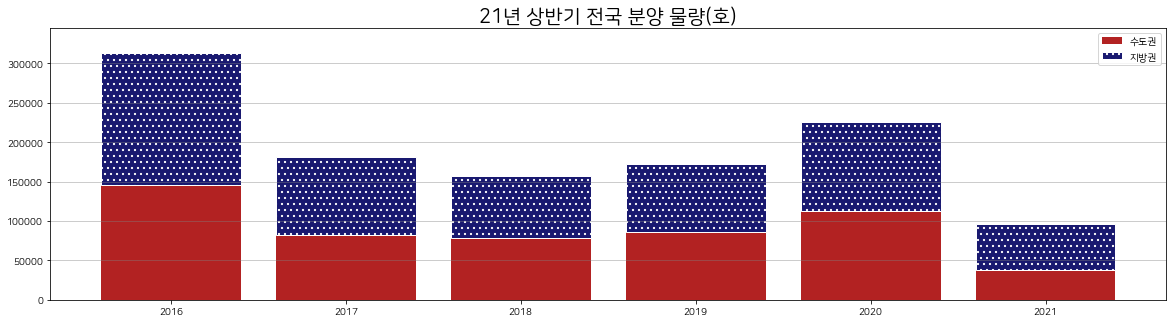

In [26]:
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

plt.figure(figsize=(20,5))

path = 'C:\\Windows\\Fonts\\NanumSquareRoundB.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

down =  df_presale.iloc[:,0] #수도권
top =  df_presale.iloc[:,1] #지방권

plt.bar(df_presale.index, down, color='firebrick')#수도권
plt.bar(df_presale.index, top, bottom=down, color='midnightblue', hatch="..",edgecolor='white') #지방권

import matplotlib.ticker as mticker
y = down + top
plt.ylim(0, y.max()*1.1)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i')) #%i 는 int , %f 는 float, %.3f : 0.001

plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='-')

plt.legend(['수도권', '지방권'])
plt.title('21년 상반기 전국 분양 물량(호)', fontsize='20')
plt.show()

## 2.8 인허가, 분양 그래프 동시 시각화
### 2.8.1 subplot 
1행 2열에 나타내기

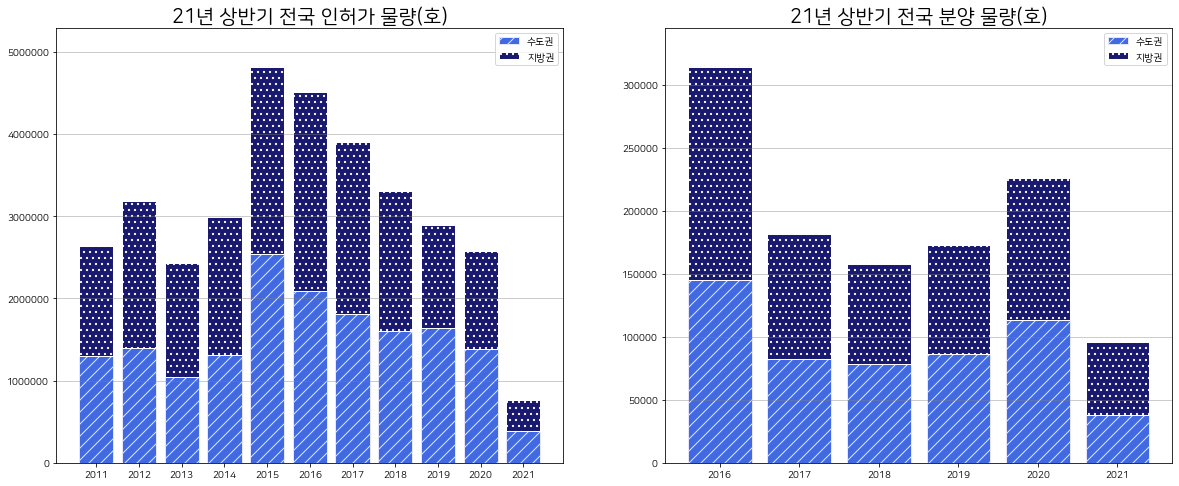

In [27]:
# 한글폰트 설정
path = 'C:\\Windows\\Fonts\\NanumSquareRoundB.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)
plt.figure(figsize=(20, 8))

# First Subplota
plt.subplot(1, 2, 1) #1행 2열. 중에 첫번째(1)
plt.title('21년 상반기 전국 인허가 물량(호)', fontsize='20')

down =  df_year.iloc[:,1]
top =  df_year.iloc[:,2]

plt.bar(df_year.index, down, color='royalblue',hatch="//",edgecolor='lavender')#수도권
plt.bar(df_year.index, top, bottom=down, color='midnightblue', hatch="..",edgecolor='white') #지방권

y = down + top
plt.ylim(0, y.max()*1.1)

plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i')) #%i 는 int , %f 는 float, %.3f 백만호 : 0.001 백만호
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='-')

plt.legend(['수도권', '지방권'])
# plt.show()


# Second Subplot
plt.subplot(1, 2, 2)
# plt.figure(figsize=(8,8))
plt.title('21년 상반기 전국 분양 물량(호)', fontsize='20')

down =  df_presale.iloc[:,0]
top =  df_presale.iloc[:,1]

plt.bar(df_presale.index, down, color='royalblue',hatch="//",edgecolor='lavender')#수도권
plt.bar(df_presale.index, top, bottom=down, color='midnightblue', hatch="..",edgecolor='white') #지방권

y = down + top
plt.ylim(0, y.max()*1.1)

plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%i')) #%i 는 int , %f 는 float, %.3f 백만호 : 0.001 백만호
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='-')

plt.legend(['수도권', '지방권'])


# Display both subplots
plt.subplots_adjust(wspace=0.2)

plt.show()